# EDA - Explanatory Data Analysis

## 1. Import libraries

In [1]:
print("######################################")
print("       Import Key Packages            ")
print("######################################")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing

######################################
       Import Key Packages            
######################################


## 2. Data import and first look

#### Import:

In [2]:
df_cars = pd.read_csv('df_cars.csv')

#### First look:

In [3]:
df_cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


#### Shape:

In [4]:
df_cars.shape

(398, 9)

#### Info:

In [5]:
# Our label is 'mpg' column.
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


#### Null Values:

In [6]:
# There is no nulls.
df_cars.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

## 3. Actions -Data Cleaning-

#### A) horsepower column:

In [7]:
# 1.'horsepower' column's type should be (int) instead of (object)
# 2.we should fill the (?) values with (NaN) and then
# replace NaN values with mean values.

#### Replace nulls with mean value:

In [8]:
df_cars.horsepower = df_cars.horsepower.str.replace('?', 'NaN').astype(float)

<ipython-input-8-ef2026995973>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_cars.horsepower = df_cars.horsepower.str.replace('?', 'NaN').astype(float)


In [9]:
df_cars.horsepower.fillna(df_cars.horsepower.mean(), inplace = True)

#### Convert dtype to int:

In [10]:
df_cars.horsepower = df_cars.horsepower.astype(int)

In [11]:
df_cars.horsepower.dtype

dtype('int32')

In [12]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int32  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 26.6+ KB


#### B) name column:

In [13]:
# So this is the column
df_cars['car name']

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: car name, Length: 398, dtype: object

#### Rename column:

In [14]:
# it's better not to have spaces
df_cars.rename(columns = {'car name':'name'}, inplace = True)

In [15]:
df_cars.name.value_counts()

ford pinto                  6
toyota corolla              5
amc matador                 5
ford maverick               5
amc gremlin                 4
                           ..
amc ambassador brougham     1
plymouth horizon tc3        1
oldsmobile vista cruiser    1
volvo 244dl                 1
chevrolet bel air           1
Name: name, Length: 305, dtype: int64

#### Correct brand names:

In [16]:
df_cars['name'] = df_cars['name'].str.replace('chevroelt|chevrolet|chevy', 'chevrolet')
df_cars['name'] = df_cars['name'].str.replace('maxda|mazda', 'mazda')
df_cars['name'] = df_cars['name'].str.replace('mercedes|mercedes-benz|mercedes benz','mercedes')
df_cars['name'] = df_cars['name'].str.replace('toyota|toyouta','toyota')
df_cars['name'] = df_cars['name'].str.replace('vokswagen|volkswagen|vw','volkswagen')

<ipython-input-16-8a48e62cd636>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_cars['name'] = df_cars['name'].str.replace('chevroelt|chevrolet|chevy', 'chevrolet')
<ipython-input-16-8a48e62cd636>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_cars['name'] = df_cars['name'].str.replace('maxda|mazda', 'mazda')
<ipython-input-16-8a48e62cd636>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_cars['name'] = df_cars['name'].str.replace('mercedes|mercedes-benz|mercedes benz','mercedes')
<ipython-input-16-8a48e62cd636>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_cars['name'] = df_cars['name'].str.replace('toyota|toyouta','toyota')
<ipython-input-16-8a48e62cd636>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_cars['name'] =

#### Group by brand name :

In [17]:
df_cars.groupby(['name']).sum().head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
name,,,,,,,,
amc ambassador brougham,13.0,8,360.0,175,3821,11.0,73,1
amc ambassador dpl,15.0,8,390.0,190,3850,8.5,70,1
amc ambassador sst,17.0,8,304.0,150,3672,11.5,72,1
amc concord,43.7,10,383.0,180,6213,37.3,158,2
amc concord d/l,18.1,6,258.0,120,3410,15.1,78,1


## 4. Statistics

#### Summary of statistics:

In [18]:
display(df_cars.describe().round(2))

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,23.51,5.45,193.43,104.46,2970.42,15.57,76.01,1.57
std,7.82,1.70,104.27,38.20,846.84,2.76,3.70,0.80
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00,1.00
25%,17.50,4.00,104.25,76.00,2223.75,13.82,73.00,1.00
50%,23.00,4.00,148.50,95.00,2803.50,15.50,76.00,1.00
75%,29.00,8.00,262.00,125.00,3608.00,17.18,79.00,2.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00,3.00


#### Skewness and Kurtosis of mpg feature:

In [19]:
# Measurments od symmetry.
# data is considered to be normal if skewness is between ‐2 to +2
# and kurtosis is between ‐7 to +7
print("Skewness: %f" %df_cars['mpg'].skew())
print("Kurtosis: %f" %df_cars['mpg'].kurt())

Skewness: 0.457066
Kurtosis: -0.510781


## 5. Data preperation

#### Replace categorical variable with actual values:

In [20]:
df_cars.origin.value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [21]:
df_cars['origin'] = df_cars['origin'].replace({1:'america', 2:'europe', 3:'asia'})
df_cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,america,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,america,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,america,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,america,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,america,ford torino


#### Create dummy variables:

In [22]:
# Values like ‘america’ cannot be read into an equation
# So we create 3 T or F columns with titles equivalent to “Is this car America?”
cData = pd.get_dummies(df_cars, columns=['origin'])
cData

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,name,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,ford torino,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,ford mustang gl,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,volkswagen pickup,0,0,1
395,32.0,4,135.0,84,2295,11.6,82,dodge rampage,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,ford ranger,1,0,0


#### Remove columns:

In [23]:
# We don't need name column for the analysis so we can deop it:
df_cars = df_cars.drop('name', axis = 1)

In [24]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int32  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(3), int32(1), int64(3), object(1)
memory usage: 23.4+ KB


## 6. Plots Analysis : Countplot + Distplot

#### Univariate Analysis:

In [25]:
# “Uni” +“Variate”  Univariate, means one variable or feature analysis.
# The univariate analysis tells us how data in each feature is distributed.

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


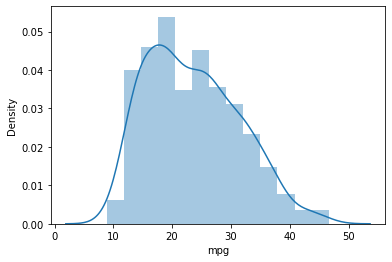

In [26]:
# The one columns that we need to analyse independentally is mpg (label):
sns_plot = sns.distplot(df_cars['mpg'])

#### Bivariate Analysis:

In [27]:
# “Bi” +“Variate” Bi-variate, means two features are analyzed together
# that how they are related to each other. 

#### Countplot:

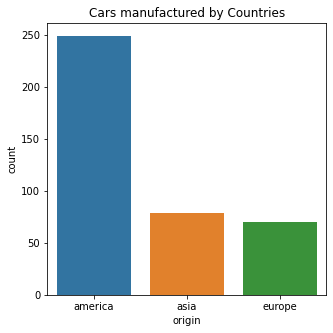

In [43]:
fig, ax = plt.subplots(figsize = (5,5))
sns.countplot(x = df_cars['origin'])
ax.set_title("Cars manufactured by Countries")
plt.show()

#### Hot is that useful?

In [ ]:
# We can visualize the distribution of origins and see clearly that 
# cars manufactured in amrecia are alot more than other origins

## 7. Plots Analysis : Boxplot + Histogram

#### Range and Distribution of Numerical data:

#### Boxplot + Distplot:

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

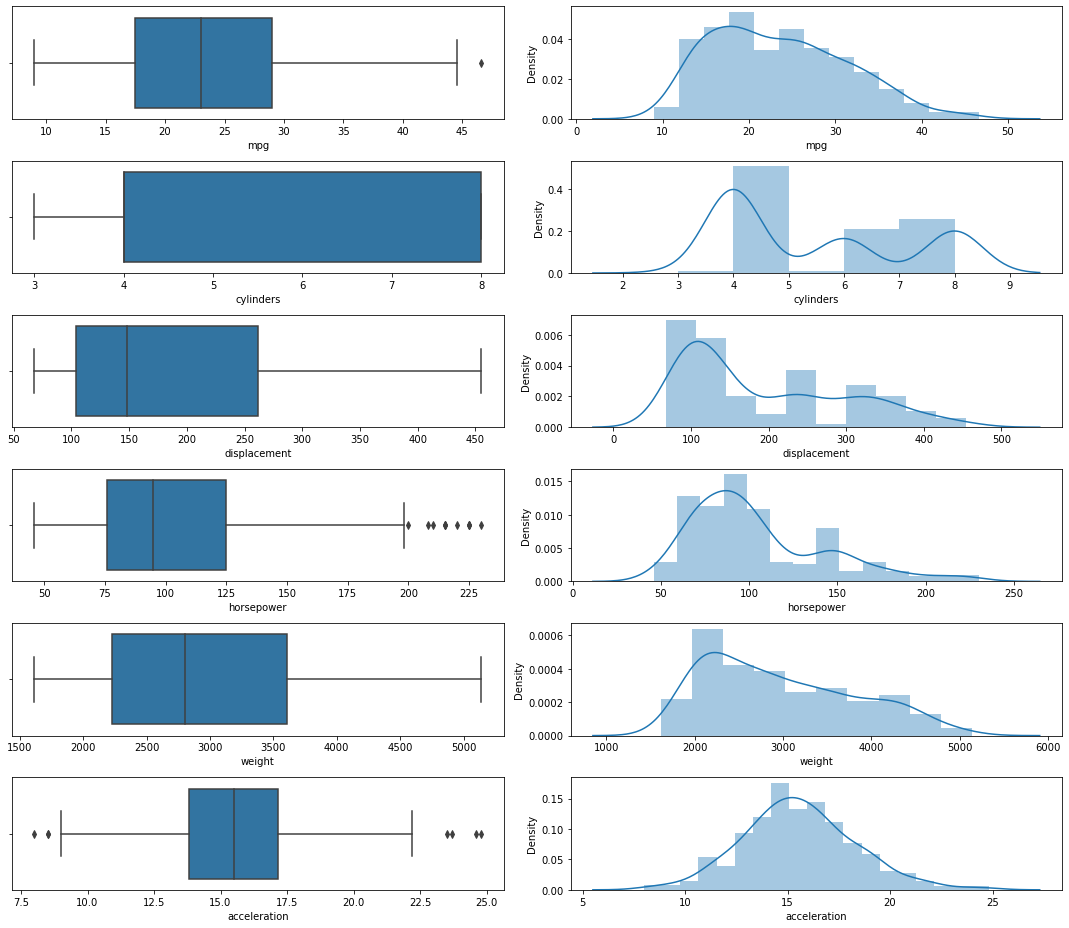

In [57]:
fig, ax = plt.subplots(6, 2, figsize = (15, 13))
sns.boxplot(x= df_cars["mpg"], ax = ax[0,0])
sns.distplot(df_cars['mpg'], ax = ax[0,1])
sns.boxplot(x= df_cars["cylinders"], ax = ax[1,0])
sns.distplot(df_cars['cylinders'], ax = ax[1,1])
sns.boxplot(x= df_cars["displacement"], ax = ax[2,0])
sns.distplot(df_cars['displacement'], ax = ax[2,1])
sns.boxplot(x= df_cars["horsepower"], ax = ax[3,0])
sns.distplot(df_cars['horsepower'], ax = ax[3,1])
sns.boxplot(x= df_cars["weight"], ax = ax[4,0])
sns.distplot(df_cars['weight'], ax = ax[4,1])
sns.boxplot(x= df_cars["acceleration"], ax = ax[5,0])
sns.distplot(df_cars['acceleration'], ax = ax[5,1])
plt.tight_layout()

#### How is that useful?

In [ ]:
#1. For example we can see that horsepower that most of the values (25-125)
#2. But yet we have som extreme valeus so we can do further analysis to discover
#3. we can see we have only one value (230) that is far away from the rest
#4. sometimes we may consider droping this datapoint for confusing the model

In [45]:
df_cars.horsepower.value_counts().head()

150    22
90     20
88     19
110    18
100    17
Name: horsepower, dtype: int64

In [54]:
df_cars.horsepower.value_counts().tail(10)

107    1
108    1
113    1
116    1
122    1
132    1
133    1
135    1
137    1
230    1
Name: horsepower, dtype: int64

#### Histogram : to see Distributions of the variables/features:

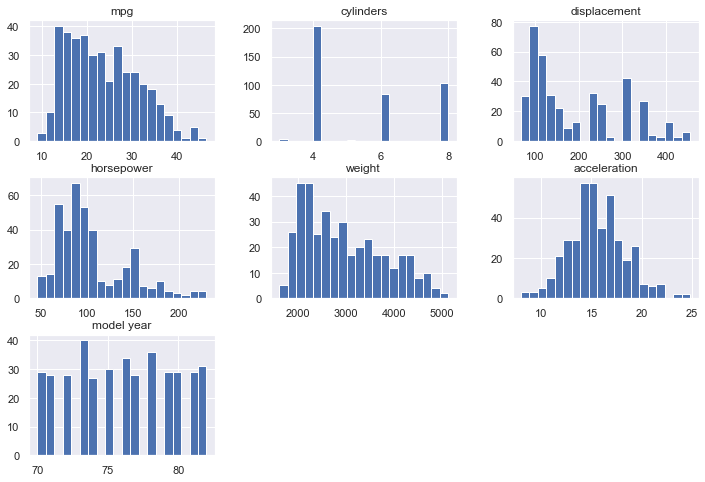

In [67]:
df_cars.hist(figsize=(12,8),bins=20)
plt.show()

#### How is this useful?

In [ ]:
#1. The acceleration of the cars in the data is normally distributed and most
# of the cars have an acceleration of 15 meters per second squared.
#2. Half of the total number of cars (51.3%) in the data has 4 cylinders.
#3. Our output/dependent variable (mpg) is slightly skewed to the right.

## 8. Plots Analysis : Scatteerplot 
## Relationship between features and label (mpg)

#### Plot Numerical Variables (y- Label, x- Feature)

In [58]:
plt.figure(1)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

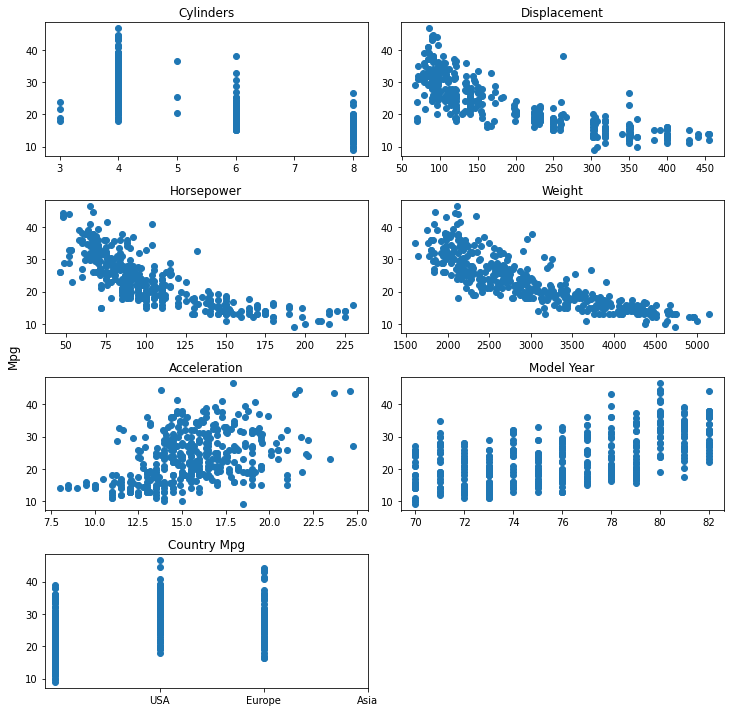

In [60]:
f,axarr = plt.subplots(4,2, figsize=(10,10))
mpgval = df_cars.mpg.values
axarr[0,0].scatter(df_cars.cylinders.values, mpgval)
axarr[0,0].set_title('Cylinders')
axarr[0,1].scatter(df_cars.displacement.values, mpgval)
axarr[0,1].set_title('Displacement')
axarr[1,0].scatter(df_cars.horsepower.values, mpgval)
axarr[1,0].set_title('Horsepower')
axarr[1,1].scatter(df_cars.weight.values, mpgval)
axarr[1,1].set_title('Weight')
axarr[2,0].scatter(df_cars.acceleration.values, mpgval)
axarr[2,0].set_title('Acceleration')
axarr[2,1].scatter(df_cars["model year"].values, mpgval)
axarr[2,1].set_title('Model Year')
axarr[3,0].scatter(df_cars.origin.values, mpgval)
axarr[3,0].set_title('Country Mpg')
# Rename x axis label as USA, Europe and Japan
axarr[3,0].set_xticks([1,2,3])
axarr[3,0].set_xticklabels(["USA","Europe","Asia"])
# Remove the blank plot from the subplots
axarr[3,1].axis("off")
f.text(-0.01, 0.5, 'Mpg', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

#### How is that useful?

In [61]:
#1. Well nobody manufactures 7 cylinders. Why…Does anyone know?
#2. cylinder has better mileage performance than other and most manufactured ones.
#3. cylinder engines have a low mileage count… , they focus more on pickup.
#4. cylinders, performance-wise, compete none neither 4 cylinders nor 6 cylinders.
#5. Displacement, weight, horsepower are inversely related to mileage.
#6. More horsepower means low mileage.
#7. Year on Year Manufacturers focussed on increasing the mileage of the engines.
#8. Cars manufactured in Japan majorly focus more on mileage.

## 9. Plots Analysis : Pairplot + Correlation(Heatmap)

#### Multi-Variate Analysis:

In [62]:
# means more than two variables or features are analyzed together.
# that how they are related to each other

#### Pairplot:

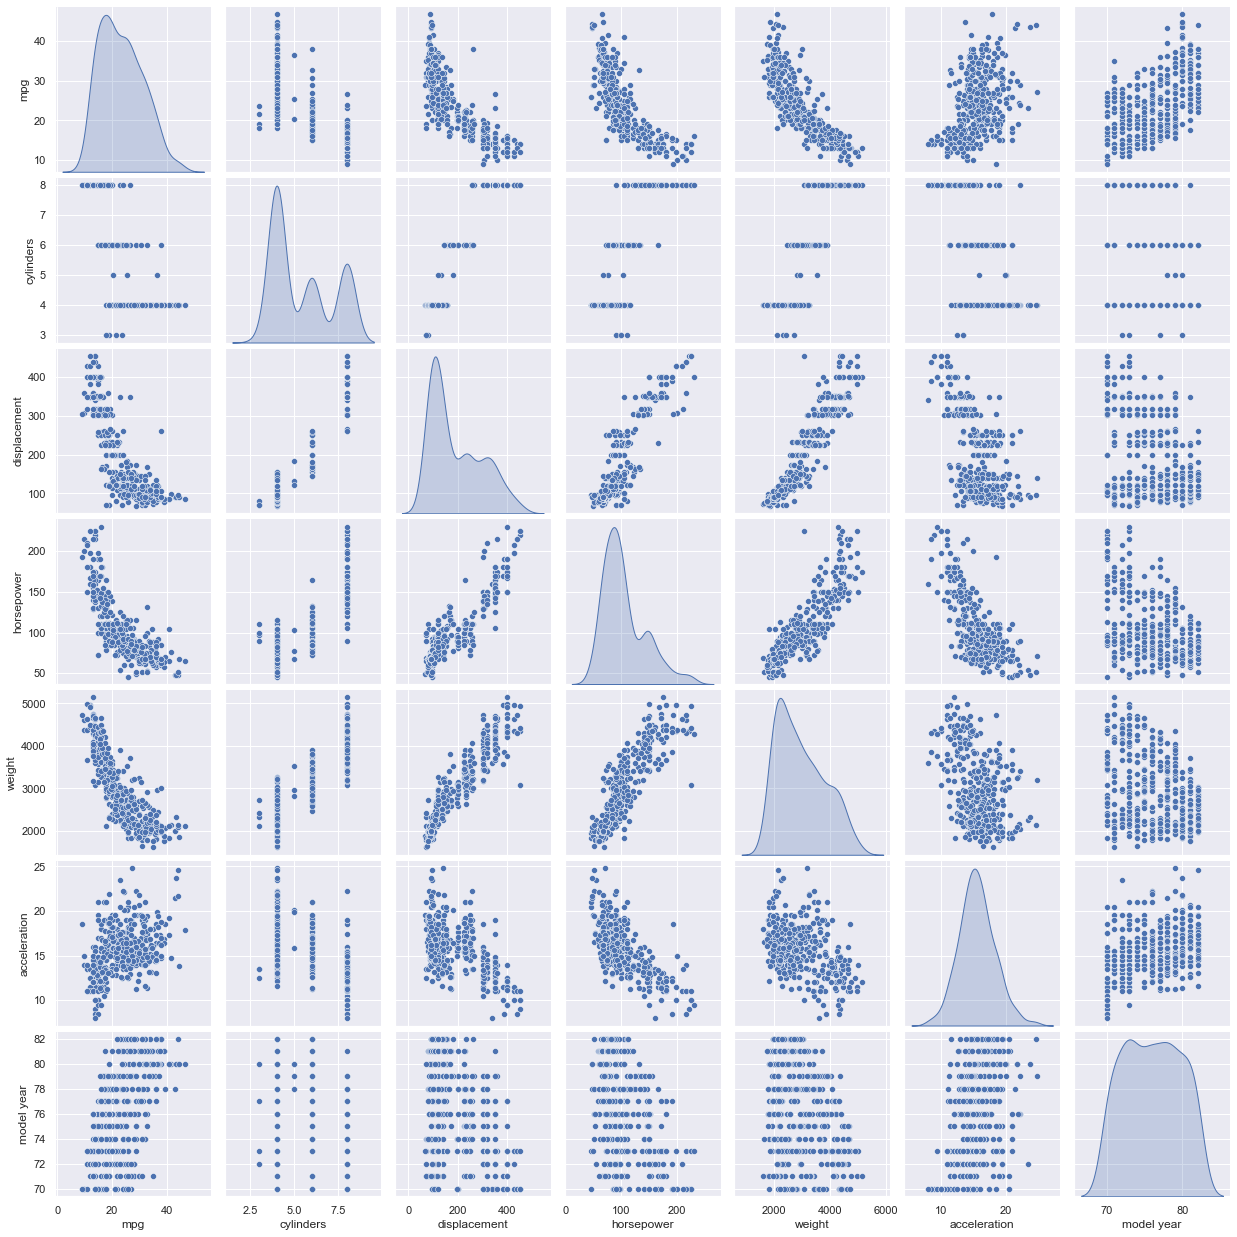

In [65]:
# With this plot we get to see the relationship bwetween every 2 features.
# First row we can see relationship between the label and all other features
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Like this we pull only numeric columns (without origin) - all rows, first 7 columns
cData_attr = df_cars.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')  

#### Results:

In [66]:
#1. Between ‘mpg’ and other attributes indicates the relationship
# is not really linear. 
#2. However, the plots also indicate that linearity would still
# capture quite a bit of useful information/pattern. 
#3. Several assumptions of classical linear regression seem to be violated,
# including the assumption of no Heteroscedasticity

#### Correlation by Heatmap:

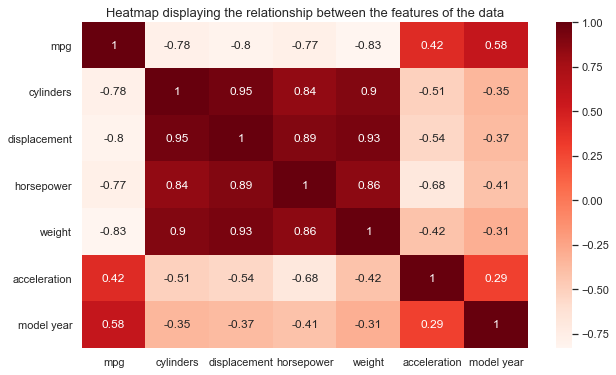

In [68]:
# Dark color represents a positive correlation,
# Light color/ white is a towards the negative correlation.
plt.figure(figsize=(10,6))
sns.heatmap(df_cars.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between the features of the data',
         fontsize=13)
plt.show()

#### Results : Relationship between the Miles Per Gallon (mpg) and the other features:

#### Strong Negative:

In [69]:
# Strong Negative correlation between displacement, horsepower, weight, and cylinders.
# This implies that, as any one of those variables increases, the mpg decreases.

#### Strong Positive:

In [ ]:
# Strong Positive correlations between the acceleration, model year
# This violates the non-multicollinearity assumption of Linear regression.
# Multicollinearity hinders the performance and accuracy of our regression model.
# To avoid this, we have to get rid of some of these variables by doing feature selection.